In [1]:
# Importing the necessay libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
# rake() can be imported from nltk_rake()

In [2]:
# finding the recommendations for the recipes based on the given ingredients.
# The recommendations are only given from the existing recipes based on  the cosine similarity.
# Extracting the data from the scraped data in the JSON file to the data dictionary.
import json
with open(r"C:\Users\shvpr\Documents\notepad_files\new_scraped_data.json", mode='r', encoding='utf-8') as f:
    feeds=json.load(f)
    
def extract_title_ingredients(d):
    if not isinstance(d, (dict, list)):
        return d
    if isinstance(d, list):
        return [extract_title_ingredients(v) for v in d]
    return {k: extract_title_ingredients(v) for k, v in d.items()
            if k not in {'ingredient_quantities', 'recipe_time','servings','yields','units','Serving_Size',
                        'Servings_Per_Recipe','Amt_per_serving','Daily_Percentile_value','url','directions'}}



data = extract_title_ingredients(feeds)
# Only the new_ingredients and recipe_titles are extracted.



In [3]:
len(data)

20914

In [4]:
# Creating two lists ing_list() and title_list and appending only the recipe_titles and the ingredients.
ing_list = []
title_list = []
for i,d in enumerate(data):
    #print(i)
    #print(d)
    #for key,value in d.items():
    ing_list.append(d.get('new_ingredients'))
    title_list.append(d.get('recipe_titles'))

        

In [5]:
ing_list[:2]

[['cup water',
  'teaspoon cider vinegar',
  'tablespoon margarine',
  'tablespoons sugar',
  'teaspoon salt',
  'teaspoon dried onion flakes',
  'teaspoon caraway seed',
  'tablespoons unsweetened cocoa',
  'cups flour',
  'cup rye flour',
  'cup oat bran',
  'teaspoon yeast'],
 ['cardamom pods lightly bruised', 'g ground coffee', 'lt water']]

In [6]:
len(ing_list)

20914

In [7]:
len(title_list)

20914

In [8]:
title_list[:10]

['European Black Bread (Bread Machine)',
 'Kahawa - Ethiopian Coffee',
 'Lentil Salad (Yemiser Selatta)',
 'Best Ever BBQ Chicken',
 'Best Cherry Pie',
 'Chicken & Rice Soup',
 'Honey BBQ Chicken',
 'Fragrant Chicken and Rice Noodle Soup',
 'Spanish Chicken & Rice Bake',
 'Impossible Cherry Pie']

In [9]:
# Constructing a dataframe consisting of recipe_titles and the ingredients.
recipe_df = pd.DataFrame({'Recipe_titles' : title_list,'Ingredients' : ing_list})

In [10]:
recipe_df = recipe_df.set_index('Recipe_titles')

In [11]:
recipe_df.head()

Ingredients
Recipe_titles                                                                          
European Black Bread (Bread Machine)  [cup water, teaspoon cider vinegar, tablespoon...
Kahawa - Ethiopian Coffee             [cardamom pods lightly bruised, g ground coffe...
Lentil Salad (Yemiser Selatta)        [lb dried lentils, tablespoons red wine vinega...
Best Ever BBQ Chicken                 [garlic cloves minced, teaspoons butter, cup H...
Best Cherry Pie                       [cups sugar, tablespoons cornstarch, teaspoon ...

In [13]:
# Function to clean the Ingredients column in the dataframe recipe_df
def clean_text(row):
    #remove non-letters
    #print(row)
    row = ','.join(row)
    print(row)
    letters_only = re.sub("[^a-zA-Z]"," ",row)
    #print('\n')
    #print(letters_only)
    words = letters_only.lower().split()
    stops = stopwords.words('english')
    meaningful_words = [w for w in words if not w in stops]
    #singles = [stemmer.stem(word) for word in meaningful_words]
    return (' '.join(meaningful_words))
               

In [14]:
recipe_df['Ingredients']=recipe_df['Ingredients'].apply(clean_text)

cup water,teaspoon cider vinegar,tablespoon margarine,tablespoons sugar,teaspoon salt,teaspoon dried onion flakes,teaspoon caraway seed,tablespoons unsweetened cocoa,cups flour,cup rye flour,cup oat bran,teaspoon yeast
cardamom pods lightly bruised,g ground coffee,lt water
lb dried lentils,tablespoons red wine vinegar,tablespoons olive oil,teaspoon salt,black pepper,garlic cloves minced,jalapenos stemmed seeded minced
garlic cloves minced,teaspoons butter,cup Heinz ketchup a must for us,cup packed brown sugar,cup chili sauce Heinz is a good one,tablespoons Worcestershire sauce,tablespoon celery seed,tablespoon prepared yellow mustard,teaspoon salt,dashes hot pepper sauce,large chicken breast halves bone in with skin a large family pack will usually have about breasts
cups sugar,tablespoons cornstarch,teaspoon salt,tablespoon butter softened,ounce canspitted tart cherries drained and reserving cup juice,teaspoon red food coloring,teaspoon almond extract,teaspoons lemon juice,pastry for 

cups pitted tart cherries undrained oz can,cup sugar,tablespoon tapioca,tablespoons butter,teaspoon salt,drops almond extract,cup flour,tablespoon sugar,teaspoons baking powder,teaspoon salt,cup butter,cup milk,egg slightly beaten
tablespoons margarine or tablespoons butter,cup light corn syrup,cup semisweet chocolate morsel,cups Rice Krispies Kellogg s is best,ounce jar maraschino cherries,cup low fat milk,ounce package vanilla instant pudding mix,cup whipped cream or cup frozen whipped topping thawed
cups sugar,tablespoons tapioca,teaspoon salt,cups pitted tart cherries,pie crust
cups pitted cherries,cup sugar,tablespoon flour,cups rhubarb,butter,cup shortening or cup butter,cup sugar,egg,cup flour,teaspoon baking powder,cup milk
inch pie crusts,ounce cans cherry pie filling,cup flour,tablespoon cinnamon
cups sour cherries with juice,cup sugar,teaspoon almond extract,tablespoons cornstarch heaping,cups flour,teaspoon salt,cup vegetable shortening well chilled,tablespoons water ice co

lbs boneless skinless chicken thighs cut into inch pieces,garlic cloves finely chopped,ounce cans white hominy drained and rinsed,medium onion chopped,teaspoon dried oregano,teaspoon cumin,teaspoon dried red pepper flakes,chicken bouillon cubes,cups water,ounce can diced tomatoes with green chilies such as Rotel,tablespoon lime juice,teaspoon salt,teaspoon pepper
lbs boneless pork shoulder,tablespoon brown sugar,tablespoons cajun seasoning,tablespoon salt,tablespoon cumin,tablespoon paprika,tablespoon fresh ground black pepper,tablespoon chili powder,tablespoon mesquite powder,cup frozen apple juice concentrate,cup cider vinegar,inch corn tortillas,cup sour cream,avocados cut into slices,cup fresh cilantro leaves may be chopped,mild green taco sauce to taste,cup onion chopped optional,cup cheddar cheese shredded optional,cup vegetable oil enough to cover tortillas in a small fry pan
lbs pork shoulder,cup water,teaspoon dried basil,teaspoon dried rosemary,ounce bottle barbecue sauce
lbs

cup butter,cup flour,cup onion chopped,cup celery chopped,cup carrot chopped,minced garlic cloves,teaspoon salt,teaspoon white pepper,teaspoon dried thyme,teaspoon poultry seasoning,cups chicken broth,cup heavy whipping cream,teaspoon nutmeg,cups rotisserie cooked chicken,cup frozen peas,sheet frozen puff pastry thawed,tablespoons butter melted optional
refrigerated pie crusts box oz,cup butter,cup onion chopped,cup all purpose flour,teaspoon salt,teaspoon black pepper,cups chicken broth from oz carton,cup milk,cups cooked boneless skinless chicken breasts shredded,cups frozen mixed vegetables thawed
cups cooked chicken cubed,cups chicken broth,cup carrot diced,cup celery diced,cup cubed and peeled potato,cup chopped onion,cup frozen peas thawed,cup frozen corn kernels thawed,teaspoon salt,teaspoon pepper,pinch sage,cup flour,cup milk,sheets frozen phyllo dough thawed,cup butter melted
medium red potatoes,lb fresh spinach stems removed and washed,ounce package Hidden Valley Original Ra

pork chops,medium onion diced,slice bacon,tablespoons butter,tablespoons cornstarch,cup water,salt pepper
boneless pork chops,tablespoon vegetable oil,ounce package pork stuffing mix,ounce can apple pie filling with cinnamon
thick cut boneless pork chops,ounce box Stove Top stuffing mix savory herb or pork are best
teaspoon salt divided,ounces boneless center cut pork chops about inch,teaspoon butter,cups low fat milk,tablespoons all purpose flour,teaspoon poultry seasoning,teaspoon black pepper,ounce packagerefrigerated mashed potatoes such as Simply Potatoes
pork cutlets of chops trimmed,cup Chinese wine or cup sherry wine,tablespoon soya sauce,tablespoon grated ginger,tablespoons chili sauce or tablespoons chili flakes,tablespoons honey
ounces boneless pork cutlets or ounces pork chops,green bell pepper chopped,onion chopped,ounce candiced tomatoes and green chilies the original recipe called for stewed tomatoes we like these better,cups corn,cup salsa,teaspoons oregano,teaspoon gro

ounce package yellow cake mix prepared according to package directions I like butter mix,eggs or as called for by your cake mix,cup oil or as called for by your cake mix,cups water or as called for by your cake mix,cup margarine,cup packed brown sugar,ounce can pineapple slices drained,maraschino cherries cut in halves
cup warm water,teaspoons active dry yeast envelopes,cups bread flour,teaspoons salt,cups warm milk,extra virgin olive oil for the bowl
cups flour,teaspoons quick rising yeast,teaspoon salt,cups hot water but not boiling,cup flour
ounce package active dry yeast teaspoons,teaspoon honey,cups warm water F,cups bread flour or cups hi gluten flour plus additional,bread flour or hi gluten flour for kneading,cup whole wheat flour,cup extra virgin olive oil,teaspoon salt,cornmeal for sprinkling baking sheets
teaspoons yeast or teaspoons quick rising yeast,teaspoon honey,cups warm water,cups bread flour,cup whole wheat flour,cup extra virgin olive oil,teaspoon salt,cup cornmeal
c

ounces maraschino cherries drained then quartered,ounces mandarin oranges drained,ounces pineapple chunks drained,ounces crushed pineapple drained very well,ounces fruit cocktail drained,ounces sour cream,ounces Cool Whip,ounce packet instant vanilla pudding,cups mini marshmallows,cup flaked coconut optional
whole pheasant breast skinned,pieces chicken skin from leg quarters,quart cold water,tablespoons kosher salt,teaspoon onion powder,teaspoon garlic powder,teaspoon dried parsley,teaspoon white pepper,teaspoon paprika
pastry for single crust pie,cup sugar,tablespoons flour,teaspoon cinnamon,teaspoon nutmeg,teaspoon allspice,teaspoon salt,cups thinly sliced peeled apples Macintosh Granny Smith,cup packed brown sugar,cup flour,cup quick cooking rolled oats,cup butter,cup toasted pecans chopped
cup sugar,cups corn syrup I use dark and light,eggs,cup butter,teaspoons vanilla,cups pecans coarsely broken,unbaked deep dish pie shell
cups flour all purpose,teaspoon salt,teaspoon baking soda,

tablespoons olive oil,large onion chopped,teaspoon minced garlic,ounce cans plum tomatoes drained,teaspoons dried basil,teaspoons ground red pepper Make SURE it s GROUND,cups chicken broth,lb penne pasta,cups grated havarti cheese,cup parmesan cheese
g box penne pasta,cup onion sliced thin,tablespoon butter,tablespoon thyme,tablespoons basil,teaspoon salt,cup half and half cream divided C,cup chicken broth,tablespoons tomato paste,tablespoon flour,cup parmesan cheese shredded
lb package penne rigate,tablespoons butter I also add tbsp olive oil,large garlic cloves minced,tablespoons flour,cup chicken or cup beef broth,cup milk or cup light cream,teaspoons dried parsley flakes,salt and pepper to taste,cup parmesan cheese grated I use more
ounces uncooked penne pasta,ounce cans Italian style diced tomatoes,ounce can cannellini beans rinsed and drained,ounce package Baby Spinach chopped,cup romano cheese shredded
lb uncooked penne pasta,tablespoons extra virgin olive oil,garlic cloves minc

grapefruits peeled and sliced,red onion peeled and thinly sliced,cup black olives pitted and chopped,cup fresh basil thinly sliced,tablespoons chives chopped,tablespoons aged balsamic vinegar,tablespoons extra virgin olive oil
small avocado,cucumber peeled and de seeded plus additional cuke for garnish,tablespoon onion minced,tablespoon olive oil,tablespoon lemon juice,tablespoon apple cider vinegar,teaspoon celtic sea salt,teaspoon chili powder,cup water,smoked paprika to garnish
large bananas ripe peeled,medium avocado ripe peeled pitted,cups frozen strawberries etc or cups frozen cherries etc
cups chopped carrots approximately lbs,cup agave nectar,teaspoon nutmeg,teaspoon cinnamon,tablespoon orange rind,eggs,cup blanched almond flour
sheets parchment paper,ounces shark fillets any firm fish fillet or ounces red snapper fillets any firm fish fillet or ounces catfish fillets any firm fish fillet or ounces pompano fish fillets any firm fish fillet or ounces orange roughy fillets any fi

lbs tilapia fillets,garlic cloves thinly sliced,tablespoons olive oil,salt and pepper,lemon for serving,chopped parsley to garnish
boneless skinless chicken breast halves,tablespoon grated lemon peel,tablespoons fresh lemon juice divided,tablespoons olive oil divided,teaspoon olive oil divided,garlic clove finely chopped,teaspoon salt,teaspoon ground black pepper,garlic cloves roasted and mashed,teaspoon sea salt,teaspoon fresh ground pepper,medium tomatoes seeded and finely chopped,cup small green pimento stuffed olive thinly sliced,tablespoons capers rinsed,tablespoons fresh basil leaves finely sliced,large Hass avocado ripe finely chopped
lb ground chicken,slices sugar free bacon crisped and crumbled,cups shredded carrots,tablespoons coconut oil,teaspoon garlic powder,teaspoon onion powder,teaspoon paprika,tablespoons finely chopped parsley,tablespoons chopped scallions divided,teaspoons salt,teaspoon ground black pepper,large jalapeno peppers halved through the stem and seeds remov

cup nonfat plain yogurt,tablespoons crumbled blue cheese ounce,tablespoon prepared blue cheese dressing plus more for garnish,tablespoon chives,cup bulgur,teaspoon salt divided,cup boiling water,ounces white mushrooms stems trimmed wiped clean and chopped may sub brown mushrooms,cup mixed chopped wild mushroom optional,cup chopped onion,teaspoon minced garlic,tablespoon balsamic vinegar,cup pecan pieces,large egg lightly beaten,cup fine dry breadcrumb Italian flavored work great,tablespoon italian seasoning may sub T Greek seasoning,fresh ground pepper
medium red potatoes cut into inch chunks,cup water,tablespoons water,small cauliflower cut into inch chunks,tablespoons vegetable oil,sweet onion chopped fine oz,garlic cloves crushed,tablespoon fresh ginger grated,teaspoons ground cumin,ounce cans chickpeas drained,ounce can fire roasted tomatoes,teaspoon turmeric,teaspoon cayenne pepper,kosher salt,cilantro for serving,plain yogurt for serving
cups sweet onions chopped,tablespoons cano

slices cinnamon raisin bread,cup low fat vanilla yogurt,cup low fat milk,eggs,teaspoon ground cinnamon,teaspoon ground nutmeg,teaspoon vanilla extract,salt
medium sweet baguette or medium sourdough baguette,large eggs,cup sweetened condensed milk,tablespoons whole milk,teaspoon vanilla extract,teaspoon kosher salt,cup granulated sugar,tablespoon unsweetened cocoa powder,teaspoon ground cinnamon,cups vegetable oil for frying estimated
cup brown sugar,cup butter melted,teaspoons ground cinnamon,tart apples peeled cored and thinly sliced,cup dried cranberries,loaf Italian bread or loaf French bread cut into inch thick slices,large eggs,cups milk,tablespoon vanilla extract
large eggs,tablespoons sugar,cups heavy cream,teaspoon pure vanilla extract,teaspoon cinnamon,teaspoon nutmeg,cup butter,ounce box Cap n Crunch cereal don t use the cheaper brands,loaf Texas toast thick bread
eggs,cup flour,cup milk,teaspoons baking powder,teaspoon salt,teaspoon cinnamon,teaspoon vanilla,slices white bre

large eggs,cup full fat milk or cup half and half cream,cup finely chopped green onions or cup chives,pinch dried basil can use cup chopped fresh basil,salt and black pepper,tablespoons butter or tablespoons oil,ounces cream cheese cut into small cubes,ounces thinly sliced smoked salmon,red onion thinly sliced
cup butter softened,ounces cream cheese softened,cups all purpose flour,cup strawberry jam,cup confectioners sugar sifted
egg lightly beaten,tablespoon finely chopped Spam or tablespoon any other cooked breakfast meat,tablespoon shredded sharp cheddar cheese optional,teaspoon ground black pepper,tablespoons butter or tablespoons margarine,cup water
lb ground beef,lb ground pork or lb sausage,cups water,cups pinhead oats or cups steel cut oats,large onion chopped,bay leaf,teaspoons salt,pinch pepper
lb russet potato about peeled cubed,slices bacon,cup green pepper chopped,tomatoes chopped,green onions sliced,eggs,cup cheddar cheese shredded
g boiled potatoes mashed,g rye flour,tea

ripe avocado,tablespoon freshly squeezed lime juice,teaspoon hot pepper sauce,garlic clove finely chopped,salt freshly ground black pepper,cooked shrimp,sliced chile,halved cherry tomatoes,coriander sprig
avocados peeled you ll want ripe ones,garlic cloves chopped,tomatoes chopped,cup red onion chopped,tablespoon lime juice,tablespoon cilantro chopped,jalapeno pepper seeded and chopped,teaspoon salt
tablespoons cream cheese warmed slightly to soften,tablespoons Pace Picante Sauce thick and chunky drained,tablespoons black olives seedless roughly chopped,tablespoons bacon fried crisp and crumbled,tablespoons red onions finely chopped,tablespoon lime juice lime preferred but lemon ok,teaspoon cilantro chopped,jalapeno pepper finely minced optional,avocados ripe firm split with stone removed,teaspoon lime juice,seasoning salt
tablespoons olive oil,teaspoons lemon juice,fresh garlic cloves minced to taste,tablespoon fresh oregano minced to taste,teaspoon fresh coarse ground black pepper to

lemons juice and zest of,tablespoons brandy or tablespoons white rum,ounces caster sugar divided,ounce packet sponge cake fingers or more,ounce containers mascarpone cheese,tablespoons lemon curd,large eggs separated,ml cream,lemon zest of finely grated mixed with,some demerara sugar optional
large ears of corn husks and silks removed,tablespoon olive oil,cup mayonnaise,tablespoons minced fresh cilantro,tablespoon fresh lime juice,garlic clove minced,teaspoon chili powder,salt,ounce queso fresco about cup or ounce farmer s cheese about cup or ounce feta crumbled about cup,pepper,lime cut into wedges for serving
ears corn,lb bacon,water for soaking,butcher string
g corn kernels drained,avocado finely chopped,tablespoons chopped chives,cup pitted chopped kalamata olive,tablespoon white wine vinegar
cups fresh corn kernels,eggs beaten,tablespoons flour,tablespoons whipping cream,cup cooked shrimp finely chopped,cup celery finely diced,green onions including tops finely chopped,tablespoons

tablespoons all purpose flour,cups fat free evaporated milk,medium garlic cloves minced,cup grated parmesan cheese,teaspoon table salt to taste,teaspoon white pepper to taste,ounces dry lasagna noodles cooked al dente about noodles,ounces cooked winter squash mashed,cup part skim mozzarella cheese shredded,cup golden seedless raisins,tablespoons pine nuts chopped
bunch kale,tablespoon olive oil,teaspoon celtic sea salt,lime,teaspoon balsamic vinegar,grapefruit sliced and chopped
ounces dried linguine,ounces andouille turkey sausage sliced diagonally inch thick,teaspoon olive oil,ounces red bell peppers cut into x inch slivers,ounces onions thinly sliced,cloves garlic minced,ounces kale cut into inch strips,cup chicken stock,cup grated parmesan cheese,salt freshly ground black pepper
cups fresh cauliflower florets cooked until firm tender and drained very well,ounces medium pasta shells or ounces similar small shell pasta,cup all purpose flour,cup butter,cups half and half cream,teaspoo

cup corn syrup,cup peanut butter,cups Rice Krispies,cups ice cream half of a l litre container or cups frozen yogurt very slightly softened half of a l litre container
fluid ounces milk,cup hot cocoa mix or packets we use Swiss Miss Milk Chocolate flavor,cups crushed ice cubes,whipped cream optional,additional hot cocoa mix optional
ounce box gelatin assorted flavors and colors,cup sugar,cup boiling water,cup ice
ounce can unsweetened coconut milk chilled,cups heavy whipping cream chilled,cup granulated sugar,tablespoon malibu coconut rum
gallon vanilla ice cream,cup crushed graham cracker,cup peanut butter,tablespoons sugar,teaspoon cinnamon,caramel ice cream topping
egg yolks beaten,tablespoons sugar,cups nonfat milk or low fat,ounces light cream cheese spread,ounces mascarpone cheese,tablespoon raspberry jam or cherry or strawberry,tablespoon lemon juice,teaspoon vanilla extract,teaspoon almond extract,tablespoons Amaretto,low fat graham crackers broken into small pieces full sheets

cups Baby Spinach washed and torn into bite size pieces,cups strawberries washed hulled and sliced,medium granny smith apple diced,green onions sliced,large jalapeno pepper seeded and minced,tablespoons cilantro chopped,citrus vinaigrette dressing,ascorbic acid optional
ounce orange roughy fillets or flounder perch or sole,butter flavored cooking spray,tablespoon Dijon mustard,teaspoons lemon juice,teaspoon reduced sodium Worcestershire sauce,tablespoons Italian seasoned breadcrumbs
cup fresh basil chopped,cup fat free mayonnaise,teaspoons Dijon mustard,teaspoon salt,teaspoon black pepper,inch whole wheat tortillas,lb roast beef sliced deli style,tomatoes thinly sliced,cups lettuce shredded
cup orange marmalade,tablespoons fresh lime juice,teaspoon shallot finely chopped,teaspoons chili powder,teaspoon sugar,teaspoon salt,teaspoon Chinese five spice powder,ounces pork tenderloin tenderloin,lb sugar snap pea trimmed,teaspoons safflower oil,teaspoons rice vinegar,teaspoon fresh ginger pe

cup miso,cup warm water,cups water,large red chile sliced,tablespoon finely grated ginger,green onions thinly sliced,chicken breasts trimmed and thinly sliced,g snow peas halved,g udon noodles,green onions thinly sliced for garnish
lbs oxtails,gallons water,inches ginger,onions,cup nuoc nam fish sauce,whole star anise,whole cloves,cinnamon stick inch,teaspoon fennel seed,tablespoons salt,bay leaves,lb rice noodles preferably inch,bunch scallion sliced,bunch cilantro,bunch basil leaves,bunch mint leaf,thinly sliced onion,cups bean sprouts,limes cut into wedges,lb filet mignon or lb top sirloin steak sliced very thinly,hoisin sauce,sriracha sauce hot chile sauce
lb dried split peas,cup diced onion,cups diced carrots,cup diced celery,teaspoon dried marjoram crushed,teaspoon salt,teaspoon pepper,lbs ham hocks
lbs stew meat cut up,cup flour,boiling potatoes cut into bite size squares,carrots peeled and sliced,stalks celery sliced,onion chopped,sprig fresh rosemary teaspoons dried crushed ro

large eggs,cup milk,teaspoon vanilla,tablespoon sugar,teaspoon salt,slices day old challah inch thick slices or French bread inch thick slices
cups Simply Potatoes Shredded Hash Browns,cup green onion chopped,teaspoon pepper,teaspoon salt,cooking oil,cup red bell pepper chopped,cup bacon diced,eggs beaten,cup milk,salt and pepper,cup cheddar cheese grated
slices bacon,cups hash browns,cup chopped onion,eggs,cup milk or cup cream,cup shredded cheese your favorite
cup white flour,tablespoons white sugar,teaspoons baking powder,teaspoon salt,tablespoons margarine,cup water,eggs or tablespoons water,cup fresh blueberries or cup frozen blueberries
ounces elbow macaroni,cup evaporated milk about can see note in description,cup whipping cream or heavy cream see note in description,teaspoon Dijon mustard,teaspoon kosher salt or other coarse salt,teaspoon cayenne pepper,ounces smoked cheddar cheese grated,ounces medium cheddar grated see note in description,ounce can diced tomatoes drained,gree

lb ground beef,ounce package taco seasoning mix,taco shells,cup salsa,cup sour cream,tomatoes small cubes,small head lettuce sliced into small confetti squares,ounce canlarge black olives sliced,cup cheese Shredded Long cheddar is good but a Mexican blend would be good too
cup cocoa or cup dutch process cocoa,cup boiling water,cups all purpose flour,teaspoon baking soda,teaspoon salt,cup butter,cup sugar,large eggs,teaspoon vanilla,cups confectioners sugar sifted,cup cocoa sifted,cup unsalted butter,teaspoon vanilla,salt pinch,cup cold strong coffee about
cup peeled and grated granny smith apple large apple,tablespoon cognac or tablespoon brandy,cups all purpose flour,cup sugar,teaspoon baking soda,teaspoon salt,teaspoon cinnamon,teaspoon nutmeg,teaspoon clove,large eggs,cup corn oil or cup canola oil,teaspoon vanilla,tablespoons unsalted butter at room temperature,ounces cream cheese softened,teaspoon vanilla,cups powdered sugar
ounce package brownie mix,eggs,cup vegetable oil,cup wat

cup butter softened,cup light brown sugar packed,ounces premium white baking chocolate such as El Rey I used store brand white chips worked fine but I didn t do the grating step,cups all purpose flour,teaspoon baking powder,teaspoon baking soda,teaspoon kosher salt,tablespoons granulated sugar,large egg slightly beaten,teaspoon pure vanilla extract preferably Madagascar Bourbon,cup macadamia nuts coarsely chopped
cups sugar,eggs,teaspoon grated fresh lemon rind,cups flour,powdered sugar to decorate,pine nuts to decorate
cup pearl barley,cups orange juice,teaspoon orange peel grated,teaspoon salt,small papaya peeled seeded and cut into small pieces,mango peeled seeded and cut into small pieces,cup pineapple chunk,cup mint leaf fresh minced,tablespoons lime juice fresh,tablespoon honey,teaspoons gingerroot minced fresh,additional mint leaf to garnish
ripe papaya lbs,tablespoons chopped cilantro,lime juice of,teaspoon cinnamon,teaspoon grated ginger,pinch salt,tablespoon olive oil,scotch 

cups jasmine rice uncooked,lbs center cut pork chops inch strips,soy sauce,vegetable oil,large garlic cloves chopped,inch fresh ginger chopped,fresh lemon zested juiced,ounce package oriental style vegetables thawed,cup oyster sauce,cup fresh basil leaf chopped,toasted sesame oil
teaspoon cornflour cornstarch,tablespoon soy sauce salt reduced,tablespoon rice wine vinegar,teaspoons black bean sauce,teaspoon Chinese five spice powder,teaspoon olive oil,g lamb steaks leg trimmed of fat and cut across the grain into strips,brown onion cut into wedges,g button mushrooms sliced,celery ribs thinly sliced diagonally,zucchini large halved lengthways thinly sliced,carrots Halved lengthways thinly sliced,Chinese cabbage shredded,garlic cloves minced,teaspoon ginger fresh finely grated,tablespoons water,g rice cup Doongara specified cooked according to package directions
cup forbidden rice,cups chicken broth or water,tablespoons sesame oil or vegetable oil,cup onion diced,cup bell pepper diced any

boneless rib eye steak inch thick,teaspoon smoked sweet paprika,teaspoon kosher salt if using kosher meat or teaspoon kosher salt if you re using non kosher meat,teaspoon fresh ground black pepper,teaspoon olive oil
ounce rib eye steaks,ounce bock beer I use Shiner Bock,tablespoons garlic chopped,tablespoons red onions diced fine,tablespoons Worcestershire sauce,dashes Tabasco sauce,limes juice of,cup brown sugar packed,tablespoon coarse brown mustard Creole is good,tablespoons olive oil,teaspoons salt
tablespoons kosher salt use only kosher salt,tablespoons brown sugar,tablespoons chili powder,tablespoons paprika,tablespoons black pepper,tablespoons garlic powder,teaspoons dried tarragon,tablespoon onion powder,tablespoon lemon pepper,tablespoon rosemary,tablespoon dried thyme,tablespoon mustard powder,teaspoon cumin,teaspoon cayenne or adjust to heat level
lbs country style pork ribs,cup soy sauce,cup hoisin sauce,teaspoons garlic powder,teaspoon onion powder,cups oil,cups flour,cups

cups flour,cup water,teaspoon salt to taste,tablespoons oil
small onion finely chopped,cup red lentil,cups vegetable stock,teaspoon salt,dash pepper,teaspoon cumin,teaspoon turmeric,tablespoons chopped cilantro,dash cayenne,teaspoons lemon juice,olive oil to drizzle
roma tomatoes cut into fours or any other tomato you like try some grape tomatoes cut in half or cherry tomatoes or a nice green,cup olive oil,cup balsamic vinegar,ounce parsley stems removed,teaspoon sea salt optional,garlic cloves pressed,tablespoon za atar spice mix green,teaspoon ground black pepper,cup feta cubed
cups white basmati rice,cold water,tablespoon salt or to taste,large onion finely chopped,cup ghee or butter
cups shredded cooked chicken or cups turkey,ounce cupsshredded low fat monterey jack cheese,ounce canchopped green chilies,cup chopped onion,ounce canlas palmas green enchilada sauce fat free,corn tortillas,cup low fat sour cream
kg rabbits jointed into pieces,cup flour seasoned with,salt and pepper,gar

tablespoons butter,g bag mini marshmallows,cup brown sugar firmly packed,cups air popped popcorn,cup M M s plain chocolate candy
cups dark chocolate or cups bittersweet chocolate,cup dried cranberries,cup walnut pieces toast walnuts if you like
ounce package milk chocolate chips or ounce package semi sweet chocolate chips,teaspoon crisco vegetable shortening,ounce box caramel popped popcorn toffee popcorn such as Crunch and Munch
red apple wash and core do NOT peel,peanut butter smooth or chunky,miniature marshmallow
cups frozen baby lima beans,cup ham chopped,teaspoon bacon drippings,cups water,teaspoon salt,teaspoon pepper
ounce bag Kraft caramels,apples,tablespoons whole milk
ounce bagvanilla variations cake mix,eggs,cup water,cup oil,teaspoon nutmeg,teaspoon allspice,teaspoon cinnamon,cup pumpkin puree
ounce package cream cheese softened,ounce package powdered sugar,ounce packagesbaker premium white baking chocolate melted,teaspoons vanilla,cup pecans toasted and chopped,drops yell

cups bread flour,cup rye flour,tablespoons oil,tablespoon brown sugar,cup water,teaspoons salt,tablespoons caraway seeds,teaspoons instant yeast
tablespoons olive oil,lbs halibut fillets rinsed and patted dry fillets,salt,garlic cloves minced,shallots minced,cups tomatoes peeled diced and drained I use Muir Glen organic,cup kalamata olive pitted,tablespoons capers,teaspoon red pepper flakes,teaspoon balsamic vinegar,fresh ground black pepper,basil leaves torn
tablespoon extra virgin olive oil,tablespoon balsamic vinegar,garlic clove minced or pressed,teaspoon kosher salt,teaspoon ground black pepper,medium tomatoes cored seeded and diced,ounce basil leaves sliced into ribbons about large leaves,ounces halibut fillets,salt and pepper
cups shredded cheddar cheese,cup grated parmesan cheese,cups half and half cream,cup flour,cup water,ounce packages frozen chopped spinach hand squeeze out excess moisture,halibut steaks about ounces each,cup melted butter or as needed,seasoning salt to tas

ounce can lemon pie filling,cup sugar,cup cornstarch,teaspoon salt,egg yolks,pint half and half,tablespoons lemon juice,tablespoons butter room temperature,teaspoon vanilla,ounce box strawberry cake mix Duncan Hines,eggs,cup oil,cups water,ounces Cool Whip,fresh strawberries garnish
ounce box devil s food cake mix,eggs or as called for by your cake mix,cup oil or as called for by your cake mix,cups water or as called for by your cake mix,ounce container whipped topping cool whip,tablespoon almond flavoring,tablespoons vanilla,ounce package instant vanilla pudding,ounce can cherry pie filling,ounce chocolate sprinkles,maraschino cherry
ounce box cake mix,cup water,cup oil,eggs,ounce cans frosting,tablespoons candy sprinkles
cup banana mashed,cup unsalted butter softened,large eggs,egg yolk,cup water,cups unbleached flour,teaspoons baking powder,teaspoon baking soda,teaspoon cinnamon,marshmallows,smarties candies blue,licorice rope
cup butter softened,cups brown sugar,eggs,cups buttermil

ounce package cream cheese softened,cup Miracle Whip,cup cheddar cheese shredded,bunch scallion diced,ounce package bacon cooked crispy,lb box Ritz cracker sleeves of crackers
whole grain baguette cut into inch to inch slices,lb serrano ham sliced thin and to fit the baguette slices,ounces manchego cheese sliced thin and slightly smaller than the ham,tablespoons olive oil approximate,teaspoons garlic minced
ounces beer,eggs,cup milk,cups flour,ounces coconut,teaspoon salt,teaspoon sugar,teaspoon baking powder,large shrimp peeled and deveined,oil for frying
egg,teaspoon garlic powder,teaspoon black pepper,cup flour,cups champagne,chopped boneless chicken breasts,tablespoon herbed salt,tablespoons champagne vinegar,clove grated garlic,pinch cayenne pepper,egg yolk,cup olive oil,teaspoon salt,teaspoon chopped parsley
tablespoons extra virgin olive oil,teaspoons red wine vinegar,teaspoons fresh lemon juice,teaspoon Dijon mustard,lb mesclun or lb arugula,kosher salt,fresh ground black peppe

cups flour,teaspoons ground ginger,teaspoon ground cinnamon,teaspoon ground cloves,teaspoon ground nutmeg,teaspoon baking soda,teaspoon salt,cup butter softened,cup packed light brown sugar,cup unsulfured molasses,large egg
cup all purpose flour,cup sugar,teaspoon salt,cups sweetened flaked coconut,egg whites,teaspoon almond extract,cup chopped almonds
cup soft butter,cup icing sugar,egg,teaspoon vanilla,teaspoons peppermint extract,teaspoon salt,teaspoon green food coloring or teaspoon red food coloring paste colouring gives a deep shade,cups flour,chocolate Hershey chocolate kisses or chocolate rosettes or chocolate wafers
cup butter softened not margarine,cup sugar,large egg,teaspoon vanilla extract,cups flour,teaspoon baking powder,teaspoon salt,cup raspberry jam,cup coconut,cup finely chopped walnuts
cups butter at room temperature or g butter,cup icing sugar,egg yolks,teaspoon baking powder,teaspoon baking soda,teaspoon salt,tablespoon brandy,teaspoon vanilla extract,cups flour,c

egg whites,egg yolks,tablespoons powdered sugar,teaspoon ground allspice,teaspoon ground cinnamon,teaspoon ground cloves,ounce lukewarm brandy,ounces lukewarm dark rum,hot water,milk,coffee,grated nutmeg
ounce vodka,ounce goldschlager cinnamon liqueur with goldflakes
ounces vodka,dash lemon juice,ounces pomegranate juice,ounces maraschino cherry juice for those that like drinks on the sweeter side optional,maraschino cherry to garnish,sugar for rim
fluid ounces chilled vodka,fluid ounce chilled peppermint schnapps,fluid ounce chilled white Creme de Cacao,Junior mints
blood orange blood,cup unsweetened pineapple juice pineapple unsweetened,quart cranberry juice red,cinnamon sticks inch pieces,piece fresh ginger inch piece fresh peeled and sliced lengthwise,whole allspice balls not ground,cloves whole,tablespoons dark brown sugar dark brown or to taste,orange slices thin garnish
ounces vodka,ounce pineapple juice,ounce Chambord raspberry liquor,ice
ounces Kahlua,ounce Stolichnaya vodka,p

lb ground turkey or lb ground beef or lb shrimp or lb fish,tablespoons southwest seasoning,cup olive oil,cup salsa,cup cider vinegar or cup balsamic vinegar,tablespoon steak seasoning,teaspoon ground cumin,cup tortilla chips slightly crushed,ounces spring mixed salad greens,tomatoes diced,ounce can black beans rinsed,cup Mexican blend cheese,cup mixed vegetables combined chopped celery onion peppers cabbage etc
lbs fresh lean ground turkey package,cup chopped onion,teaspoons dried oregano,teaspoon dried mint,teaspoon parsley,teaspoon lemon pepper be aware that most lemon pepper blends are salty so add any additional salt sparingly,garlic clove minced,teaspoon lemon juice,cup nonfat sour cream,medium cucumber peeled and finely chopped,teaspoons lemon juice,teaspoon black pepper,inch pita breads cut in half crosswise or flour tortillas,lettuce leaves torn into pieces,medium tomatoes chopped
eggs,cup milk,tablespoons water,tablespoons flour,teaspoon salt,ounces cream cheese softened,table

cups spaghetti,cups boiling water,teaspoons beef bouillon or teaspoons vegetable bouillon,teaspoon instant minced onion,teaspoon parsley
flour tortillas inch or pita bread,tablespoons mayonnaise,ounces sliced turkey or ounces ham thin deli slices,slice cheese cut into strips cheddar provolone swiss etc,tablespoons romaine lettuce shredded,small avocado,cup fresh tomato diced,dash lemon juice or dash lime juice,tablespoons carrots diced or shredded optional,tablespoon green pepper diced optional
cup confectioners sugar,teaspoons ground cinnamon,large apples
ounce packages puff pastry sheets sheets per package,egg,tablespoon water,lbs ground beef,cup green pepper chopped,cup white onion chopped,garlic clove minced,medium tomatoes seeded and chopped,cup catsup,cup fresh cilantro or cup parsley chopped,teaspoon ground cumin,teaspoons chili powder,teaspoon oregano,teaspoon cinnamon,cups monterey jack cheese shredded or cups monterey jack pepper cheese shredded for a spicier result or cups c

ounce packagebaker semi sweet chocolate baking squares,cup firmly packed brown sugar,cup butter or cup margarine softened,large eggs,teaspoon vanilla,cup flour,teaspoon baking powder,ounce packagebaker semi sweet chocolate baking squares coarsely chopped or cups baker semisweet chocolate chunks,cups pecans optional or cups walnuts optional
cup unsalted butter,ounce unsweetened baking chocolate,cup Splenda granular,tablespoon half and half or tablespoon cream,tablespoons peanut butter,cup chopped walnuts or other nuts
tablespoons kraft fat free mayonnaise,teaspoon mustard preferably the kind that has no cals,tablespoons water
ounce can black beans,chopped green chili optional,ml salsa medium or mild,ml nonfat sour cream cup,ounces light cheddar cheese grated,baked corn tortilla chips
favorite pasta sauce,lb hamburger meat,wonton wrappers,ounces mozzarella cheese grated,ounces parmesan cheese grated,ounces ricotta cheese half reserved for frosting if desired,cherry tomatoes for garnish,s

medium onion chopped,garlic cloves minced,tablespoons olive oil,ounce can chicken broth,ounce package frozen chopped spinach,ounce package couscous,cup fresh grated parmesan cheese,tablespoons lemon juice,salt to taste,fresh ground pepper to taste,cup chopped pecans toasted
small yucca root yuca or medium yucca root yuca,tablespoons butter knob,salt to taste
tablespoons oil,tablespoon salsa lizano,cups black beans cooked,cups rice cooked,tablespoons bell peppers chopped,tablespoons onions chopped,tablespoon coriander chopped Celantro
cup butter,teaspoon cinnamon ground,teaspoon cardamom ground,teaspoon clove ground,cups chicken stock,cup currants,cups couscous,tablespoons butter,teaspoon salt,cup cashews or cup pistachios
tablespoons lime juice,garlic cloves minced,cup cilantro fresh,ounce can green chilies,teaspoons salt may omit if using salty broth,onion medium,tablespoon butter,cups rice white long grain,cups chicken broth
g butter,onion finely sliced,garlic clove crushed,cup cousc

lb medium shrimp peeled and deveined,tablespoon pure olive oil,tablespoons garlic finely chopped,cups white wine I use chardonnay,fresh lemon Juice only,teaspoon italian seasoning,cup softened butter,tablespoon parsley,cup grated parmesan cheese
cups buttermilk baking mix small box equals cups Bisquick or Jiffy Mix,cup milk,cup shredded cheddar cheese extra sharp,cup butter,teaspoon garlic powder
cups Bisquick,cup milk,cup shredded cheddar cheese,tablespoons butter,teaspoon garlic powder,teaspoon Old Bay Seasoning
cups Bisquick,cup milk,cup cheddar cheese shredded,cup butter or cup margarine melted,teaspoon garlic powder
cup sour cream,cup pina colada nonalcoholic drink mix,cup crushed pineapple canned,tablespoons granulated sugar,cups canola oil as required by fryer,large shrimp peeled and deveined about pound,cups all purpose flour,tablespoons granulated sugar,teaspoon salt,cup milk,tablespoons Captain Morgan Parrot Bay Coconut Rum,cup panko Japanese style bread crumbs,cup flaked coc

cup sugar,cups water,bunch of fresh mint,lime juice of,tablespoons tequila
large eggs,lime zest of minced,tablespoon lime juice,cup buttermilk,bananas large very ripe mashed,cup unsalted butter room temperature,cups granulated sugar,cups all purpose flour,teaspoon baking soda,cup shredded coconut,ounce package cream cheese reduced fat room temperature,cup powdered sugar sifted
cup sugar,cups fresh lime juice limes,teaspoon grated lime zest lime,cups water
cup Splenda granular or cup sugar,tablespoons water,teaspoons lime zest,tablespoon lime juice,teaspoon fresh ginger peeled finely grated,cups honeydew melon cut in chunks
ounce package lime gelatin dry,cups cottage cheese,cup crushed pineapple drained,cups whipped topping thawed,cup walnuts chopped
inches graham cracker crust homemade or store bought,ounce can sweetened condensed milk,cup lime juice about fresh limes,teaspoon lime zest,cups frozen non dairy whipped topping thawed
g salmon fillets skin removed,egg white,tablespoons fin

cup sugar see note in introduction,teaspoon baking soda,teaspoon salt,teaspoon vanilla extract,cup creamy peanut butter I used natural no sugar added chunky pb,large egg lightly beaten,cup semi sweet chocolate chips make sure theyre gluten and or or lactose free if thats a concern,cup roasted peanuts chopped
lb powdered sugar,cup cocoa,cup fat free evaporated milk,cup butter,teaspoon vanilla two if you love it like me
cup sugar,cup cocoa,cup butter,cup milk add more if needed,tablespoon light corn syrup,cups sifted confectioners sugar,teaspoon vanilla,cup chopped nuts optional
ounces firm silken tofu,cup sugar,teaspoons vanilla,teaspoons almond extract see notes,cup cocoa powder
cup low fat peanut butter,cup honey slightly warm,cup powdered milk or cup toasted wheat germ,cup finely grated coconut
ounces ziti pasta,hot Italian sausage links about lb,cup white wine I typically use pinot grigio but any white or even red will work well,ounce can san marzano tomatoes,teaspoon crushed red pe

ounce cans chunk tuna in water well drained original recipe did not call for draining liquid,g packages sugar substitute brand of choice,tablespoons wine vinegar I used Red WV,tablespoons Worcestershire sauce I used L P,tablespoons prepared yellow mustard French s,tablespoons dried onion flakes,teaspoon chili powder,teaspoon liquid smoke hickory optional my addition,cup water my addition to replace liquid drained off tuna
ounce can tuna drained,ounce can sweet corn drained,red bell pepper chopped,orange bell pepper chopped,green pepper chopped,cup fresh parsley chopped,tablespoons pickles chopped,tablespoons fresh lemon juice,tablespoons olive oil,salt,fresh pepper
lb mahi mahi,ounces spinach leaves,ounces feta cheese,small tomatoes,onion Sliced,slices pita bread,ounces salsa
g canned tuna in water,g creamed corn tablespoons fresh corn can be substituted,small onion finely diced,tablespoon flour,egg,tablespoon grated cheese,tablespoon chopped fresh parsley optional
ounce tilapia fillet

cup unsweetened applesauce,cup brown sugar I m sure this could be reduced,eggs,teaspoon vanilla,cups whole wheat flour,teaspoon baking soda,cup ripe mashed banana,cup nonfat sour cream
ounces canned diced green chiles,lb monterey jack cheese coarsely grated,lb cheddar cheese coarsely grated,cup evaporated milk,eggs separated,tablespoon flour,teaspoon salt,teaspoon pepper,tomatoes thinly sliced
count packagefrozen burritos,ounce can enchilada sauce,cups shredded cheese,sour cream optional,salsa optional
lb lean ground beef,teaspoon salt,teaspoon black pepper,tablespoons instant minced onion,tablespoon fresh garlic minced I use the canned kind so I don t have to hand mince it,lb elbow macaroni,ounce can tomato paste,cup water,ounce can stewed tomatoes,teaspoon salt,teaspoon black pepper,teaspoon msg
lbs ground beef,ounce packageshot chili seasoning mix,cup water,ounce cans diced tomatoes with jalapenos,ounce can dark red kidney beans rinsed and drained,ounce canlight red kidney beans rin

cup butter melted,cup water,tablespoons vanilla instant pudding mix about package of pudding,cup milk,egg beaten,tablespoon sugar,teaspoon salt,cups bread flour,teaspoons yeast,cup butter softened,cup brown sugar,teaspoons cinnamon,cup chopped walnuts optional,cup raisins optional,ounces cream cheese softened,cup butter softened,cups confectioners sugar,teaspoon vanilla extract,teaspoons milk
ounce package refrigerated crescent dinner rolls,teaspoons sugar,teaspoon ground cinnamon,cup powdered sugar,teaspoon milk,drop vanilla
cup water plus,tablespoons water,tablespoons unsalted butter softened,cups bread flour,cup granulated sugar,teaspoon salt,teaspoon bread machine yeast,cup granulated sugar,teaspoons ground cinnamon,tablespoons unsalted butter softened,cup powdered sugar,teaspoon vanilla,tablespoon milk
tablespoons fresh squeezed orange juice,teaspoon Dijon mustard,tablespoons apple cider vinegar,tablespoons honey,tablespoons extra virgin olive oil
lb butter,cup onion,teaspoon oreg

cup butter melted,cup butter flavored cracker crushed Pepperidge Farm s are excellent but Club crackers also serve just fine,tablespoons parmesan cheese grated,teaspoon dried oregano,teaspoon dried basil,teaspoon garlic powder,lb cod fish fillet
lbs corned beef brisket flat cut,head cabbage cut in four wedges,lb bag baby carrots,large potatoes cut in four wedges coated with,olive oil,large onions cut in four wedges coat with,olive oil,cup brown sugar,tablespoons prepared mustard,teaspoon ground cloves
cups hot water,tablespoons apple cider vinegar,tablespoons sugar,teaspoon fresh ground black pepper,large onion cut into wedges,lbs corned beef brisket with spice packet partially frozen,ounce package baby carrots,head cabbage cut into about wedges lbs,ounces canned whole potatoes drained
kg corned beef pounds,brown onion grams,cloves,bay leaves,black peppercorns,carrot grams coarsely chopped,tablespoons brown sugar,tablespoons malt vinegar,sprigs basil,water to cover corned beef
kg corne

cup packed cocoa powder I use organic,cup milk,cups sugar I use organic cane sugar,teaspoon salt I use kosher salt,teaspoon vanilla extract I use organic
graham wafers,cups almonds sliced,cup butter not margarine,cup brown sugar,cups chocolate chips
cups whole milk,ounces mexican chocolate ounces semi sweet chocolate,teaspoon cinnamon,tablespoons sugar,pinch salt,teaspoon vanilla preferably Mexican,cinnamon stick to garnish
tablespoons soft butter,cups confectioners sugar,cup hershey s cocoa light flavor,cup hershey s cocoa medium flavor,cup hershey s cocoa dark flavor,cup milk,teaspoon vanilla
whole boneless skinless chicken breast,cups chicken stock,egg whites,tablespoon cornstarch,teaspoons salt,ounces spinach leaves,tablespoons oil,tablespoon sherry wine,tablespoons cornstarch dissolved in,tablespoons cold water
cups chicken broth,cups sliced fresh mushrooms,tablespoons rice vinegar or tablespoons white vinegar,tablespoons soy sauce or tablespoons reduced sodium soy sauce,teaspoon 

cups cooked chicken cut into bite size pieces I used a small rotisseri chicken and really like the flavor it adds,cup yellow onion chopped,cup red sweet bell pepper chopped,cup green bell pepper chopped,garlic cloves minced,tablespoon butter,ounce cans Rotel Tomatoes,ounce can tomato sauce,ounces sliced fresh mushrooms,ounce can sliced ripe olives drained,tablespoons dried basil,tablespoons dried oregano,ounces spaghetti cooked and drained and coated with a little,olive oil to prevent sticking,cups shredded Mexican blend cheese Monterey Jack Cheddar Queso Quesadilla Asadero cheese combination,cups shredded sharp cheddar cheese,cup parmesan cheese shredded,ounce can cream of mushroom soup,ounce can cream of chicken soup,ounce can milk use soup can,cup water,teaspoon salt,teaspoon fresh ground pepper,paprika to garnish
cup chopped fresh cilantro,cup light sour cream,tablespoon minced chipotle chile canned in adobo sauce,teaspoon ground cumin,teaspoon chili powder,teaspoons fresh lime jui

cup chopped onion,garlic clove minced,tablespoon oil,cups chopped cooked chicken,ounce canchopped green chilies,cup chicken broth,teaspoons chili powder,teaspoon ground cumin,ounces Philadelphia Cream Cheese,inches flour tortillas,lb cubed Velveeta cheese,tablespoons milk,cup salsa
cups cooked chicken cubed,cup onion chopped,cup part skim ricotta cheese,cup plain low fat yogurt,ounces low fat cheddar cheese shredded,ounces part skim mozzarella cheese shredded,corn tortillas,ounces enchilada sauce
cups chopped cooked chicken,cups shredded monterey jack cheese,cup shredded cheddar cheese,ounce canschopped green chilies,flour tortillas,tablespoons butter,cup flour,cups chicken broth,teaspoon cumin,teaspoon garlic powder
cups cooked chicken diced or shredded,cup fresh bean sprout,cup fresh mushrooms coarsely chopped,cup leek chopped,cup onion chopped,cup carrot grated,chilies chopped optional but I say use them,tablespoon hot sauce I used Denzil s Kamakazi optional,salt pepper,ounce can cr

large beets or medium,large apples each peeled and cut into wedges or medium,cup crumbled blue cheese,teaspoon prepared horseradish
ounces beef top round steak well trimmed and cut into large chunks,cup fresh cilantro chopped,cups red onions minced,cup red onion wedged,tablespoons canned green chilies diced,teaspoon chili powder,teaspoon ground cumin,teaspoon salt,ounces monterey jack pepper cheese shredded,cup tomato juice,teaspoon lime zest grated,tablespoon fresh lime juice,teaspoon grapeseed oil,cups romaine lettuce shredded,cherry tomatoes quartered
ounces ground beef I used ground chuck,ounces cheddar cheese slices I use Cabot seriously sharp vermont cheddar,slices onions,teaspoon seasoning salt,teaspoon ground black pepper,cups water
boneless skinless chicken breasts,cup butter,cup parmesan cheese grated,cup saltine crackers crushed,garlic cloves crushed and chopped,teaspoon parsley
whole head of garlic roasted,ounces fat free cream cheese softened
tablespoons butter,tablespoons

cups all purpose flour about ounces,cups granulated sugar,cup sweetened flaked coconut,cup chopped pecans,teaspoons baking soda,teaspoon salt,teaspoons ground cinnamon,tablespoons canola oil,large eggs,cups grated carrots,cups canned crushed pineapple drained
piece fresh ginger peeled the size of a walnut,g carrots chopped,ml vegetable broth,g cream cheese low fat,teaspoon cayenne pepper,salt and pepper,apple chopped finely optional
cup cocoa,tablespoons cocoa,cup flour,teaspoons baking powder,cup sugar,cup carrot shredded,cup skim milk,tablespoons applesauce,egg whites beaten,teaspoon vanilla
cups flour,cup whole wheat flour,teaspoons baking soda,teaspoons cinnamon,teaspoon nutmeg,teaspoon salt,large egg,large egg whites,cups brown sugar packed,cup vegetable oil,cups carrots shredded,cup buttermilk,cup crushed pineapple drained,cup raisins,ounces neufchatel cheese,cups powdered sugar,teaspoon vanilla extract,teaspoons skim milk
mediun head cauliflower broken into very small florets,me

cups milk,teaspoons active dry yeast,eggs,tablespoons butter melted and cooled,cup granulated sugar,teaspoon salt,cups all purpose flour plus more for rolling out the dough,cups vegetable oil,cup milk,cups confectioners sugar,teaspoon vanilla,teaspoon salt
cups flour,teaspoons baking powder,teaspoons sugar,teaspoon salt,teaspoon baking soda,cup vegetable oil,egg beaten slightly,cups buttermilk c more if needed to keep batter thinner
ounce packages yeast,cup water,cups lukewarm milk scalded then cooled,cup sugar,teaspoon salt,eggs,cup shortening,cups all purpose flour,canola oil,cup butter,cups powdered sugar,teaspoons vanilla,tablespoons hot water,cup butter,cups powdered sugar,teaspoons vanilla,tablespoons hot water,ounces milk chocolate chips or ounces semi sweet chocolate chips
lb dried figs or lbs fresh figs,cup sugar,cup water c for dried figs c for fresh,cup butter room temp,cup sugar,large egg,tablespoon cream or tablespoon milk,teaspoon vanilla,teaspoon salt,teaspoon baking pow

large eggplant,vegetable oil,cup flour,eggs scrambled,cup breadcrumbs,cups mozzarella cheese grated,cup romano cheese grated,ounces marinara sauce
lb ground chuck browned drained,medium onion,garlic clove,tablespoon sugar,tablespoon italian seasoning,ounce can crushed tomatoes,ounce can tomato sauce,ounce can tomato paste,salt pepper,i always add alittle extra oregano,medium eggplants peeled sliced about inch thick,egg beaten,cup Italian breadcrumbs about,ounce container ricotta cheese,ounce packageshredded mozzarella cheese,cup parmesan cheese,oil for frying
large eggs,tablespoons cold water,cup dry breadcrumbs,teaspoon seasoning salt,teaspoon dried Italian seasoning,teaspoon garlic powder,teaspoon fresh ground black pepper,cup grated parmesan cheese divided,large eggplant peeled and cut into about inch slices,tablespoons olive oil or as needed,cups shredded mozzarella cheese divided can use more if desired,cups prepared marinara sauce
medium eggplant,cup Italian seasoned breadcrumbs,

tablespoons packed dark brown sugar,teaspoons Dijon mustard,tablespoon soy sauce,teaspoon rice vinegar,ounce salmon steaks about inch thick
ounce salmon fillets center cut about inch thick with skin,teaspoons lime zest fresh finely grated,garlic clove chopped use one large clove,cup fresh lime juice,teaspoon salt,teaspoon black pepper,cup unsalted butter melted
large salmon fillet,cup dark brown sugar,tablespoon coarse salt,teaspoon garlic powder,teaspoon ginger powder,ground pepper optional
tablespoons dry white wine,tablespoons fresh lemon juice,tablespoons low sodium soy sauce,teaspoon salt,teaspoons olive oil,clove garlic minced,ounce salmon fillets about inch thick,cooking spray
cup fresh orange juice,cup tamari or cup soy sauce,cup cream sherry,cup Dijon mustard,tablespoons fresh ginger peeled grated,tablespoons honey,ounce salmon fillets about an inch thick,to taste green onion cut into fans
lbs salmon,garlic cloves minced,tablespoons onions grated,salt and pepper,teaspoon papri

shallot,blood oranges,teaspoons balsamic vinegar,teaspoon red wine vinegar,extra virgin olive oil,salt and pepper,lbs asparagus spears
tablespoons red wine vinegar,tablespoons fresh lemon juice,tablespoons olive oil,small shallots very thinly sliced,cup flat leaf parsley finely chopped,tablespoons pink peppercorns slightly crushed,fresh ground pepper,lb fresh asparagus,tablespoons olive oil
tablespoons olive oil,garlic cloves,lb salmon,lb asparagus fresh,tablespoons cheese shredded I used a combination of parmesan romano and asiago
lb asparagus trimmed,tablespoon olive oil,tablespoons pine nuts toasted,cup parmesan cheese shaved,tablespoons shallots finely chopped,teaspoons lemon zest save a few strands for garnish,tablespoons fresh lemon juice,tablespoon capers drained,tablespoons fresh flat leaf parsley chopped,tablespoons extra virgin olive oil,salt and fresh cracked black pepper to taste
lb fresh asparagus,tablespoon olive oil,tablespoon soy sauce,salt and pepper
lb fresh asparagus

lbs potatoes cut into halves,slices bacon,medium yellow onions or medium white onion chopped,tablespoon all purpose flour,tablespoon sugar,teaspoon celery seed,dash fresh ground black pepper,cup water,cup vinegar
dove breasts,ounce bottle Italian dressing,jalapeno pepper per dove,slices bacon slice per dove,salt and pepper
ounces sweet tea flavored vodka Sweet Carolina Fire Fly or other,ounces lemonade,crushed ice,lemon wedge
ounces dry yeast,cups warm water,teaspoon salt,cups all purpose flour,cups whole wheat flour,toasted sesame seeds
cup hemp milk or other milk,tablespoon honey,pinch cinnamon,pinch ground coriander,pinch ground nutmeg
large eggs hardboiled,tablespoon butter at room temperature,cup shelled walnuts,tablespoons minced fresh dill,pinch salt,tablespoon hot mexican salsa,lettuce leaves or other salad greens for serving
garlic cloves peeled,large celery rib including leaves,lb fresh jalapeno pepper including seeds,large red bell pepper cored and seeded,cups fresh dill coa

cups vegetable oil,ounce can Pillsbury Refrigerated Crescent Dinner Rolls,snack size container vanilla pudding oz,tablespoons caramel sauce,teaspoon kosher salt coarse,cup powdered sugar,milk,additional caramel sauce if desired
lb ground beef,teaspoon italian seasoning,tablespoons olive oil,ounce jar spaghetti sauce recommended bleu s Minute Easy Pizza Sauce,ounce box spaghetti cooked as directed,loaf sliced white bread slices,cup butter room temperature sticks
lbs ground beef,cups finely chopped onions,cup breadcrumbs,cup ketchup,dash hot sauce,dash Worcestershire sauce,cup finely chopped fresh parsley,large eggs lightly beaten,teaspoon thyme,teaspoon salt,teaspoon pepper,barbecue sauce for glaze
ounces uncooked elbow macaroni,eggs,cup shredded cheddar cheese,lb ground beef,cup chopped onion,ounce can pizza sauce,ounce can mushroom stems and pieces DRAINED,pepperoni slices,cup shredded Mexican blend cheese or cup additional cheddar cheese
ounces elbow macaroni,cup hormel turkey pepper

loaf white bread or bread cubes equal to loaf,medium onion,stalks celery,apple optional,cup margarine or cup butter,cup chicken broth,tablespoons newfoundland savory a package or teaspoon of regular ground savory,teaspoon dried sage,teaspoon salt
turkey carcass broken into pieces,any defatted pan juices or leftover gravy,cups water to cover the carcass completely,medium onions coarsely chopped,stalks celery leaves coarsely chopped,cup diced carrot,cup diced well washed leek optional,cup diced turnip,garlic cloves minced,teaspoon salt if desired,bouquet garni,sprigs fresh parsley or teaspoons dried parsley flakes,teaspoon dried thyme leaves,bay leaf,tablespoons minced onions,minced garlic clove,tablespoon olive oil,cup diced carrot,cup diced celery,cup finely chopped mushroom,tablespoons flour,cups turkey stock,teaspoon dried marjoram,salt freshly ground black pepper,cup raw barley or cup rice,hot pepper sauce optional,cup diced turkey meat,dash hot pepper sauce,tablespoons chopped fres

ounces smoked trout flaked,tablespoons mayonnaise,tablespoon yellow mustard,radishes sliced,teaspoons fresh dill chopped,salt to taste,pepper to taste,lemon juice to taste,baguette sliced diagonally in inch thick slices,teaspoons olive oil for basting,salt to taste
tablespoons fresh orange juice,tablespoon fresh lime juice,teaspoons honey,tablespoons chopped fresh cilantro,cup extra virgin olive oil plus,tablespoon extra virgin olive oil,kosher salt,fresh ground pepper,skinless and boneless smoked trout fillets broken into large flakes,large seedless oranges cut into sections,small red onion,leaves cup shaped radicchio,pea shoots or fresh cilantro stems or celery leaves to garnish
trout fillets,cup all purpose flour,ounce cans beer,teaspoon cayenne pepper
fresh trout,slices toasted bread diced,cup chopped bell pepper,cup chopped onion,chopped celery,garlic clove minced,cup melted butter or cup melted margarine,teaspoons parsley,teaspoon salt,teaspoon pepper,teaspoon paprika optional,ta

ounces tempeh crumbled into tiny pieces,cup celery finely chopped,cup scallion finely chopped,cup vegan mayonnaise I prefer Vegenaise,teaspoon dried dill,teaspoon celery salt or to taste,fresh black pepper to taste
tablespoons olive oil divided,lb tempeh cubed,red bell pepper thinly sliced,small red onion thinly sliced,garlic cloves minced,teaspoons dried thyme or tablespoons chopped fresh thyme,teaspoon salt,fresh black pepper,large leaves swiss chard torn into pieces or any leafy green
lb rice noodles,tablespoons oil,garlic cloves minced,lb boneless skinless chicken thinly sliced,tablespoon chili garlic sauce,tablespoon fish sauce or teaspoon salt,tablespoons soy sauce,tablespoon brown sugar,lb asparagus spear cut into inch pieces
cup tamari soy sauce soy sauce,cup water,fresh grated ginger about tbsp or to your taste,tablespoons brown sugar,minced garlic clove,tablespoons cornstarch,cup cold water
boneless thin pork chops,cloves minced garlic I use jar type,teaspoons oil,tablespoons

cup soy sauce,cup honey,tablespoon roasted sesame seeds,teaspoons fresh ginger minced or teaspoons ground ginger,chicken breasts
cup maple syrup,cup water,tablespoon fresh ginger grated,garlic clove chopped,teaspoon cayenne pepper ground,g salmon fillets,salt
ounces thin spaghetti,green onions sliced,cup rice vinegar,tablespoons low sodium soy sauce,tablespoon freshly grated gingerroot,tablespoons honey,teaspoons sesame oil,teaspoon chili paste,teaspoon toasted sesame seeds
cup fresh gingerroot,cup table salt,limes,cup vegetable oil
lbs whole spelt flour,cup sunflower seeds,cup pumpkin seeds,cup flax seed,cup sesame seeds roasted,cups water,tablespoons vinegar,tablespoon salt,teaspoon salt,ounce packages dry yeast
cups bread flour,tablespoons sugar,teaspoon salt,ounce fast rise yeast or tablespoon fresh yeast,cup unsalted butter,cup milk plus,tablespoons milk,large eggs,cup unsalted butter plus,tablespoon unsalted butter,tablespoons turbinado sugar brand Sugar in the Raw,tablespoons ma

tablespoons olive oil,tablespoons butter,veal scallopini,flour mixed with,salt pepper for dredging,eggs and,tablespoons water whisked,cup chicken broth,lemon juiced,lemon sliced for garnish,fresh parsley to garnish,tablespoons butter
cup breadcrumbs,vegetable oil,ounce pork cutlets or ounce veal cutlets pounded thin,tablespoons butter,cloves garlic minced,sage leaves chopped,cup chicken broth,teaspoon brown sugar,tablespoons balsamic vinegar,parmesan cheese shavings
veal cutlets scallopine style,salt pepper flour for dredging mixed,tablespoons olive oil,tablespoon butter,lb mushroom sliced,cup marsala wine,cup chicken stock
veal chops,tablespoons olive oil,salt and pepper,tablespoon tarragon,lb cremini mushroom sliced,tablespoons flour,cup chicken stock,tablespoons heavy cream,dash nutmeg
g packages Kool Aid your favourite flavour,cups sugar,gallon cold water
veal chops about inch thick,cloves garlic finely chopped,tablespoon fresh rosemary finely chopped,tablespoons olive oil,salt fre

In [14]:

len(recipe_df)

20914

In [15]:
recipe_df.isnull().sum()

Ingredients    0
dtype: int64

In [16]:
#Calculate the tfidf vector matrix and find the top ingredients for a particular recipe
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',sublinear_tf=True,stop_words='english',ngram_range=(1,1))
tfidf_data=tfidf.fit_transform(recipe_df['Ingredients'])
data_dtm=pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names())
features = tfidf.get_feature_names()

In [17]:
data_dtm.head()

aaloobukharay  abbey  abc  able  aborio  abou  abricot  absinthe  absolut  \
0            0.0    0.0  0.0   0.0     0.0   0.0      0.0       0.0      0.0   
1            0.0    0.0  0.0   0.0     0.0   0.0      0.0       0.0      0.0   
2            0.0    0.0  0.0   0.0     0.0   0.0      0.0       0.0      0.0   
3            0.0    0.0  0.0   0.0     0.0   0.0      0.0       0.0      0.0   
4            0.0    0.0  0.0   0.0     0.0   0.0      0.0       0.0      0.0   

   absolute    ...     zinfandel  zing  zip  ziploc  zippy  ziti  zoodles  \
0       0.0    ...           0.0   0.0  0.0     0.0    0.0   0.0      0.0   
1       0.0    ...           0.0   0.0  0.0     0.0    0.0   0.0      0.0   
2       0.0    ...           0.0   0.0  0.0     0.0    0.0   0.0      0.0   
3       0.0    ...           0.0   0.0  0.0     0.0    0.0   0.0      0.0   
4       0.0    ...           0.0   0.0  0.0     0.0    0.0   0.0      0.0   

   zucchini  zucchninii  zwieback  
0       0.0         0.0       0.0  
1       0.0         0.0       0.0  
2       0.0         0.0       0.0  
3       0.0         0.0       0.0  
4       0.0         0.0       0.0  

[5 rows x 7203 columns]

In [18]:
# writing the top ten ingredients with TFIDF weights occuring in a descending manner to the top_dict.
data_dtm_transposed = data_dtm.transpose()
top_dict={}
top_dt = {}
for c in data_dtm_transposed.columns:
    top = data_dtm_transposed[c].sort_values(ascending=False).head(10)
    top_dict[c] = list(zip(top.index,top.values))
    top_dt[recipe_df.index[c]] = list(top.index)

In [37]:
len(top_dt)

19930

In [22]:
# Storing the words after the ingredients columns has been reduced to individual words
# and appending a list,words.
words=[]
for c in data_dtm_transposed.columns:
    top = [word for (word,value) in top_dict[c]]
    for t in top:
        words.append(t)

In [23]:
# finding the most commonly occuring words based on the word count.
from collections import Counter
Counter(words).most_common()

[('teaspoon', 1410),
 ('cup', 1312),
 ('ounce', 1167),
 ('cups', 1161),
 ('baking', 1128),
 ('teaspoons', 1027),
 ('ounces', 1006),
 ('sugar', 961),
 ('tablespoons', 914),
 ('tablespoon', 874),
 ('chopped', 851),
 ('optional', 835),
 ('vanilla', 820),
 ('diced', 800),
 ('cheese', 777),
 ('lemon', 777),
 ('taste', 762),
 ('chicken', 756),
 ('milk', 749),
 ('finely', 745),
 ('water', 740),
 ('ground', 725),
 ('powder', 711),
 ('butter', 708),
 ('fresh', 706),
 ('chocolate', 699),
 ('sliced', 686),
 ('egg', 683),
 ('cream', 676),
 ('flour', 675),
 ('margarine', 652),
 ('lb', 652),
 ('extract', 650),
 ('dried', 645),
 ('juice', 639),
 ('sauce', 638),
 ('cinnamon', 625),
 ('slices', 608),
 ('melted', 607),
 ('medium', 600),
 ('softened', 593),
 ('cut', 587),
 ('soda', 579),
 ('minced', 567),
 ('eggs', 555),
 ('potatoes', 555),
 ('bread', 546),
 ('orange', 532),
 ('peeled', 532),
 ('lbs', 527),
 ('large', 526),
 ('beaten', 521),
 ('half', 521),
 ('package', 516),
 ('use', 508),
 ('white', 50

In [24]:
#In the above data we see some words like bought,store,tablespoons,festive..etc add no meaning to the ingredients
# adding these words to stopwords again...
stop_list=['tablespoons','teaspoon','festive','ounce','ounces','lbs','use','inch','purpose','low','cup','like',
           'small','large','heavy','used','fav','substitute','temperature','removed','cups','finely','optional',
           'bunch','style','ml','old','lengthwise','prefer','needed','flat','refrigerated','quarts','lb',
          'stick','inches','separated','quart','active','just','feel','make','depending','using',
          'original','kg','want','real','great','approx','bought','type','double','note','tbsp','called',
          'approximately','new','paper','fast','directions','ears','angel','quarters','according',
          'gallon','leftover','left','cover','leave','cm','liter','available','recommended','diagonally',
          'equal','variety','minutes','total','usually','adjust','try','remove','nutritional','including',
          'aluminium','sec','equivalent','sure','simply','possible','day','really','fully','won','store','bought','bottled','table',
          'ready','rocket','won','gram']

In [25]:
# update our document form matrix

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Add new stop words
# performing union operation with the built-in stop words and the user_defined stop words.
stopwords = text.ENGLISH_STOP_WORDS.union(stop_list)

# recreate document term matrix
tfidf1 = TfidfVectorizer(stop_words=stopwords,sublinear_tf=True,ngram_range=(1,2))
vect_matrix = tfidf1.fit_transform(recipe_df['Ingredients'])
#labels = recipe_df['recipe_titles']
data_stop=pd.DataFrame(vect_matrix.toarray(),columns=tfidf1.get_feature_names())
#data_stop.index=train_df.index

In [26]:
data_stop.head()

aaloobukharay  aaloobukharay teaspoons  abbey  abbey blue  abc  abc brand  \
0            0.0                      0.0    0.0         0.0  0.0        0.0   
1            0.0                      0.0    0.0         0.0  0.0        0.0   
2            0.0                      0.0    0.0         0.0  0.0        0.0   
3            0.0                      0.0    0.0         0.0  0.0        0.0   
4            0.0                      0.0    0.0         0.0  0.0        0.0   

   able  able form  able pour  able taste       ...        zucchini walnuts  \
0   0.0        0.0        0.0         0.0       ...                     0.0   
1   0.0        0.0        0.0         0.0       ...                     0.0   
2   0.0        0.0        0.0         0.0       ...                     0.0   
3   0.0        0.0        0.0         0.0       ...                     0.0   
4   0.0        0.0        0.0         0.0       ...                     0.0   

   zucchini washed  zucchini wheat  zucchini white  zucchini yellow  \
0              0.0             0.0             0.0              0.0   
1              0.0             0.0             0.0              0.0   
2              0.0             0.0             0.0              0.0   
3              0.0             0.0             0.0              0.0   
4              0.0             0.0             0.0              0.0   

   zucchini zucchini  zucchninii  zucchninii salt  zwieback  zwieback toast  
0                0.0         0.0              0.0       0.0             0.0  
1                0.0         0.0              0.0       0.0             0.0  
2                0.0         0.0              0.0       0.0             0.0  
3                0.0         0.0              0.0       0.0             0.0  
4                0.0         0.0              0.0       0.0             0.0  

[5 rows x 102183 columns]

  #      Visualization

In [24]:
# forming wordclouds for visualization
from wordcloud import WordCloud
wc= WordCloud(stopwords=stopwords,background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

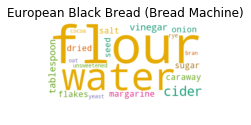

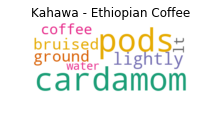

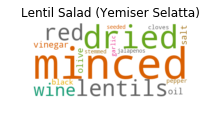

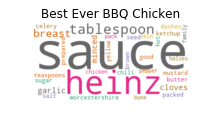

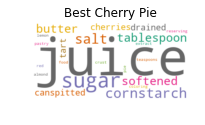

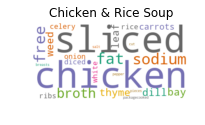

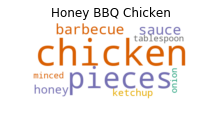

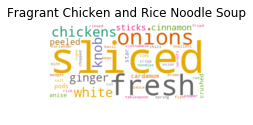

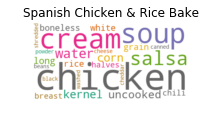

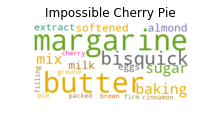

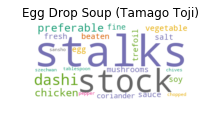

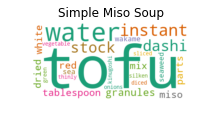

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
data_stp=data_stop.transpose()
for index,recipe_num in enumerate(data_stp.columns[:12]):
    wc.generate(recipe_df['Ingredients'][recipe_num])
    plt.figure(figsize=(10,10))
    plt.subplot(6,2,index+1)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.title(recipe_df.index[index])
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.25, top=0.9, wspace=0.6, hspace=0.3)
#plt.show()
#plt.tight_layout()
#plt.show()

In [27]:
# Sparse matrix generated by Tf-IDF vectorizer
vect_matrix

<20914x102183 sparse matrix of type '<class 'numpy.float64'>'
	with 931476 stored elements in Compressed Sparse Row format>

In [28]:
# Finding the shape of the sparse matrix
vect_matrix.shape

(20914, 102183)

In [29]:
# Compress the sparse matrix row-wise.
from scipy import sparse
vect_matrix = sparse.csr_matrix(vect_matrix)

In [30]:
def recommendations_func(recipe_name,dom):
    #constructing a pandas series from the dataframe df index
    indices=pd.Series(recipe_df.index)
    #initialize empty recommendations list
    recommendations = []
    
    #getting the index of the movie title passed into recommendations_func
    idx = indices[indices==recipe_name].index[0]
    #Int64Index([600], dtype='int64') so we extract the [0] element.
    print(idx)
    
    from sklearn.metrics.pairwise import cosine_similarity
    cosine_sim = cosine_similarity(dom[idx],dom)
    
    # creating a Series with the similarity scores in descending order
    cosine_sim = cosine_sim.flatten()
    score_series = pd.Series(cosine_sim).sort_values(ascending = False)
    print(score_series[:10])


    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommendations.append(recipe_df.index[i])
             
    return recommendations



In [31]:
recommended_recipes = recommendations_func('Best Ever BBQ Chicken',vect_matrix)

3
3        1.000000
13516    0.222867
1509     0.218141
15822    0.211890
6992     0.184122
6936     0.167601
13959    0.167337
12907    0.162058
15712    0.158170
6182     0.156425
dtype: float64


In [32]:
recommended_recipes 
# The output shows the top ten recommended recipes which are similar to the recipe "Best Ever BBQ Chicken".

['Bobbie-Q Sauce (Barbecue Sauce)',
 'Country Style Pork Ribs in a Crock Pot',
 'Roasted Bone-In Chicken Breasts With Herbs',
 'Savory Sweet Crock Pot Chicken',
 'Baked Balsamic Chicken',
 'Independence Day Chicken',
 'Very Simple Oven Fried Chicken -- Low Fat',
 'Sweet Hot Mustard Chicken Wings',
 'Ww Easy Barbecued Chicken',
 'Crock Pot Old South Pulled Pork on a Bun']

In [35]:
import logging
#data_df = data_stop.copy()
#data_df.index = recipe_df.index
data_dtm =data_stop.transpose()
def top_ingredient_recommendations(ingredient):
    #df = recipe_df.index
    pop_list=[]
    top_dict={}
    for c in data_dtm_transposed.columns:
        top = data_dtm_transposed[c].sort_values(ascending=False).head(10)
        top_dict[recipe_df.index[c]] = list(top.index)
    for key,value in top_dict.items():
        if ingredient in value:
            pop_list.append(key)
    return pop_list[:5]
            

In [38]:
top_ingredient_recommendations('chicken')

['Chicken & Rice Soup',
 'Honey BBQ Chicken',
 'Spanish Chicken & Rice Bake',
 'Simmering Hot and Sour Soup',
 'Creamy Cheesy Chicken & Rice']

The above result shows top five recommendations for an ingredient "chicken".